In [1]:
import xarray as x
data_accf = x.open_dataset("/Users/annika/Desktop/Project/Full_Data/DT00/f100___________20171202_0000_accf_gp.nc", engine='netcdf4')
data_accf

<xarray.Dataset>
Dimensions:         (time: 30, lon: 128, lev: 31, lat: 64, tbnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon             (lon) float32 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lev             (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0
  * lat             (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: tbnds
Data variables:
    YYYYMMDD        (time) float64 ...
    dt              (time) float64 ...
    nstep           (time) float64 ...
    hyam            (lev) float32 ...
    hybm            (lev) float32 ...
    atr20_o3        (time, lev, lat, lon) float32 ...
    atr20_ch4       (time, lev, lat, lon) float32 ...
    atr20_h2o       (time, lev, lat, lon) float32 ...
    atr20_contrail  (time, lev, lat, lon) float32 ...
    atr20_co2       (time, lev, lat, lon) float32 ...
    aps             (time, lat, lon) float32 ...
    time_bnds       (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             accf_gp
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_accf_gp.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [2]:
data_ECHAM = x.open_dataset("/Users/annika/Desktop/Project/Full_Data/DT00/f100___________20171202_0000_ECHAM5.nc", engine='netcdf4')
data_ECHAM

<xarray.Dataset>
Dimensions:      (time: 30, lon: 128, lat: 64, lev: 31, ilev: 32, tbnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon          (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat          (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lev          (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * ilev         (ilev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0 32.0
Dimensions without coordinates: tbnds
Data variables: (12/85)
    YYYYMMDD     (time) float64 ...
    dt           (time) float64 ...
    nstep        (time) float64 ...
    hyam         (lev) float32 ...
    hybm         (lev) float32 ...
    hyai         (ilev) float32 ...
    ...           ...
    sigmadot     (time, ilev, lat, lon) float32 ...
    tke          (time, lev, lat, lon) float32 ...
    ocu          (time, lat, lon) float32 ...
    ocv          (time, lat, lon) float32 ...
    aps          (time, lat, lon) float32 ...
    time_bnds    (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             ECHAM5
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_ECHAM5.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

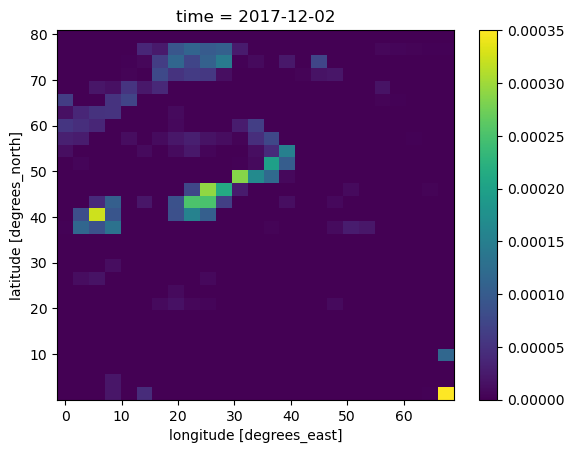

In [3]:
# Rain rate [kg m^-2 s^-2]
rsfl = data_ECHAM['rsfl_2d'].isel(time = 0)
rsfc = data_ECHAM['rsfc_2d'].isel(time = 0)
rainr = rsfl + rsfc

rainrplot = rainr.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()

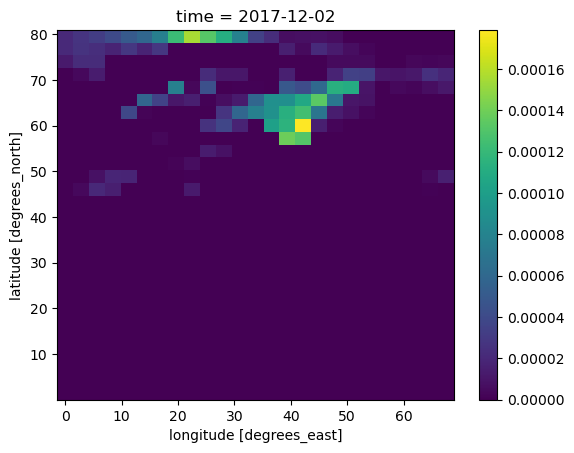

In [4]:
# Snow rate [kg m^-2 s^-2]
ssfl = data_ECHAM['ssfl_2d'].isel(time = 0)
ssfc = data_ECHAM['ssfc_2d'].isel(time = 0)
snowr = ssfl + ssfc

snowrplot = snowr.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()

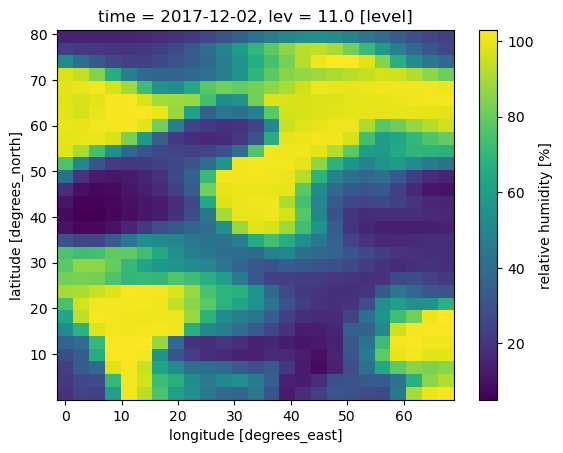

In [5]:
# Relative humidity
rel_hum = data_ECHAM['rhum'].isel(time = 0, lev = 10)
rel_humplot = rel_hum.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()

In [6]:
# Relative temperature
rel_temp = data_ECHAM['...'].isel(time = 0, lev = 10)
rel_tempplot = rel_temp.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()

KeyError: ''

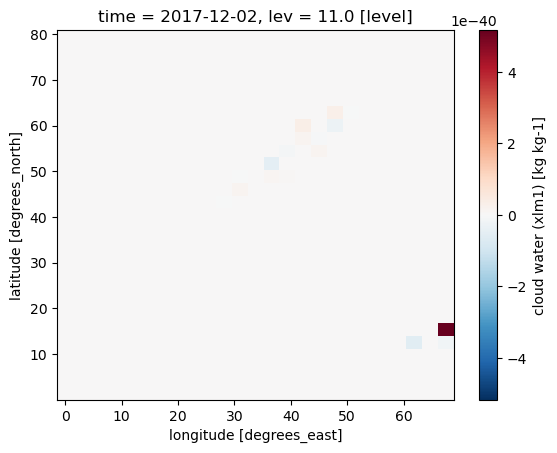

In [7]:
# Cloud water
cloud_water = data_ECHAM['xlm1'].isel(time = 0, lev = 10)
cloud_waterplot = cloud_water.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()

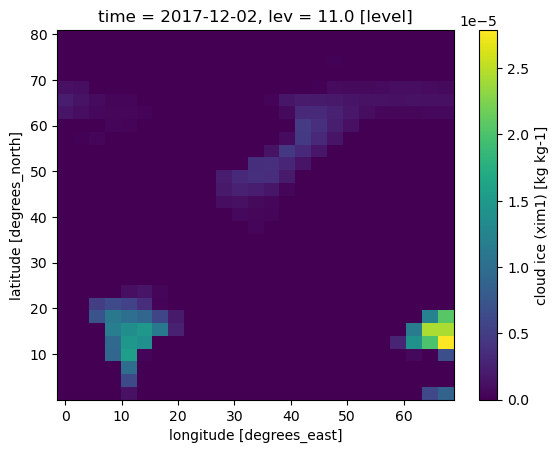

In [8]:
# Cloud ice
cloud_ice = data_ECHAM['xim1'].isel(time = 0, lev = 10)
cloud_iceplot = cloud_ice.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()

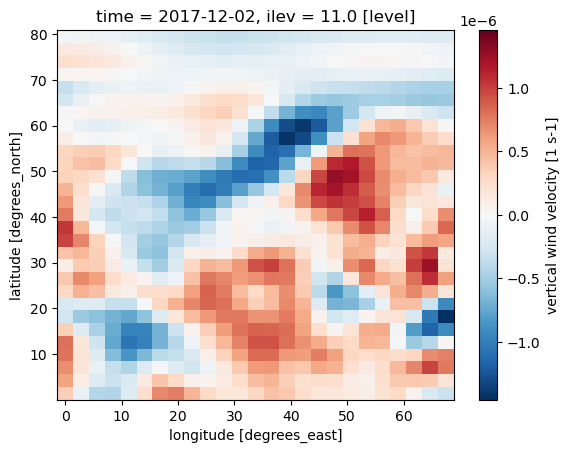

In [9]:
# Vertical winds
vert_winds = data_ECHAM['etadot'].isel(time = 0, ilev = 10)
vert_windsplot = vert_winds.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()

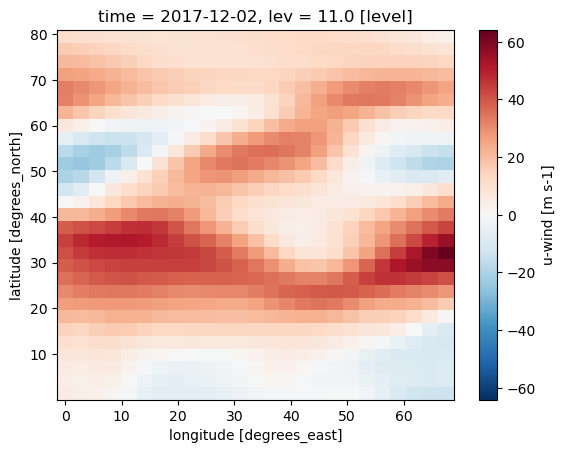

In [132]:
# u-winds
u_wind = data_ECHAM['um1'].isel(time = 0, lev = 10).sel(lat=slice(80., 0.), lon=slice(0., 70.))
u_windplot = u_wind.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()


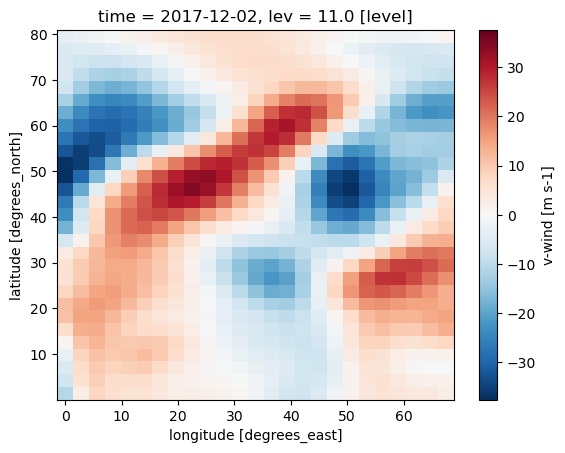

In [133]:
# v-winds
v_wind = data_ECHAM['vm1'].isel(time = 0, lev = 10).sel(lat=slice(80., 0.), lon=slice(0., 70.))
v_windplot = v_wind.sel(lat=slice(80., 0.), lon=slice(0., 70.)).plot()

The shape of the longitude, latitude, u_wind, and v_wind are resp.: (25,) (29,) (29, 25) (29, 25)


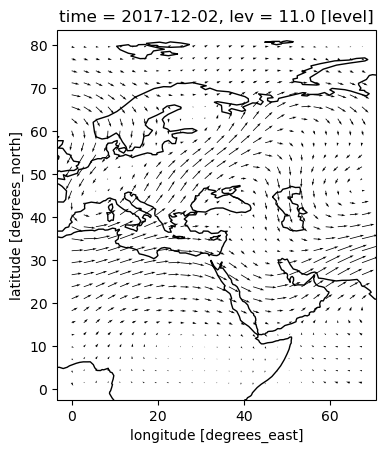

In [148]:
# u-winds & v-winds altogether [m s^-1]
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

lon, lat = np.meshgrid(u_wind.lon, u_wind.lat)
print("The shape of the longitude, latitude, u_wind, and v_wind are resp.:", lon[0].shape, lat[:,0].shape, u_wind.shape, v_wind.shape)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.quiver(lon, lat, u_wind, v_wind)
plt.title("time = 2017-12-02, lev = 11.0 [level]")
ax.set_xlabel("longitude [degrees_east]"); ax.xaxis.set_visible(True)  # Hidden by default
ax.set_ylabel("latitude [degrees_north]"); ax.yaxis.set_visible(True)
plt.show()